In [543]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [544]:
titanic = pd.read_csv("Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [545]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [546]:
titanic.drop(['PassengerId','Name','Ticket','Embarked','Cabin'],inplace=True,axis=1)

In [547]:
print(titanic.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


#### Missing Values for features

In [548]:
[[features,titanic[features].isnull().sum()] for features in titanic.columns if titanic[features].isnull().sum()>0]

[['Age', np.int64(177)]]

#### Heat Map for Missing Values

<Axes: >

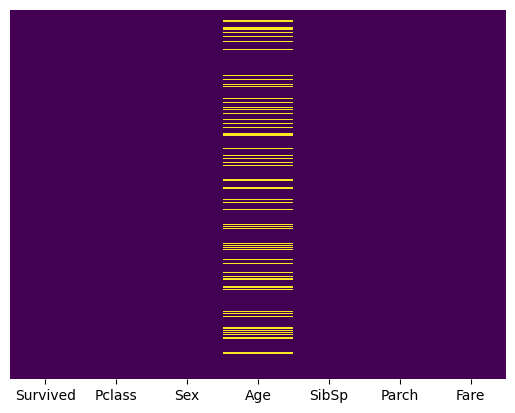

In [549]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [550]:
print(titanic.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [551]:
pd.crosstab(titanic.Pclass,titanic.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [552]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

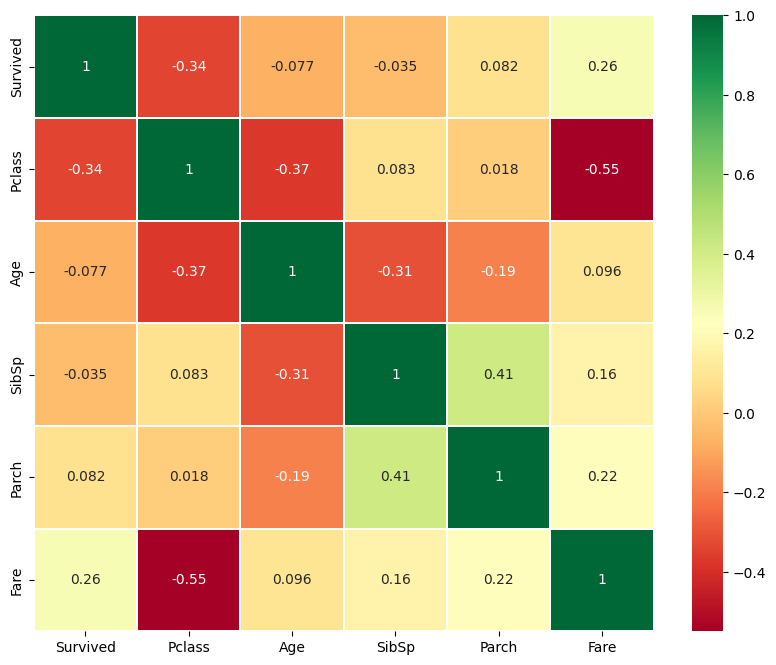

In [553]:
corr_matrix = titanic.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)

plt.show()


In [554]:
titanic.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
889,1,1,male,26.0,0,0,30.0000


In [555]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [556]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [557]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)  # Filling missing values with median


C:\Users\cheta\AppData\Local\Temp\ipykernel_25928\1230573844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)  # Filling missing values with median


In [558]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [559]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])  # "female" → 0, "male" → 1


In [560]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [561]:
titanic.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [562]:
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

In [563]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70 , test_size = 0.30, random_state = 1, shuffle=True)

In [564]:
from sklearn import tree
#classifier = tree.DecisionTreeClassifier()
classifier = tree.DecisionTreeClassifier(max_depth=3)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [565]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_test, y_pred)

0.7873134328358209

In [566]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[136,  17],
       [ 40,  75]])

Text(50.722222222222214, 0.5, 'Truth')

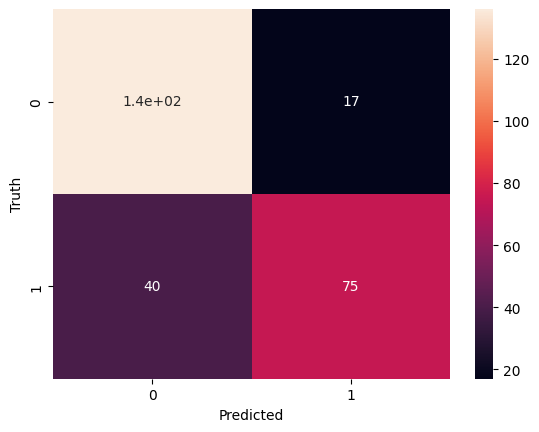

In [567]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [568]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       153
           1       0.82      0.65      0.72       115

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



#### References

https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/notebook

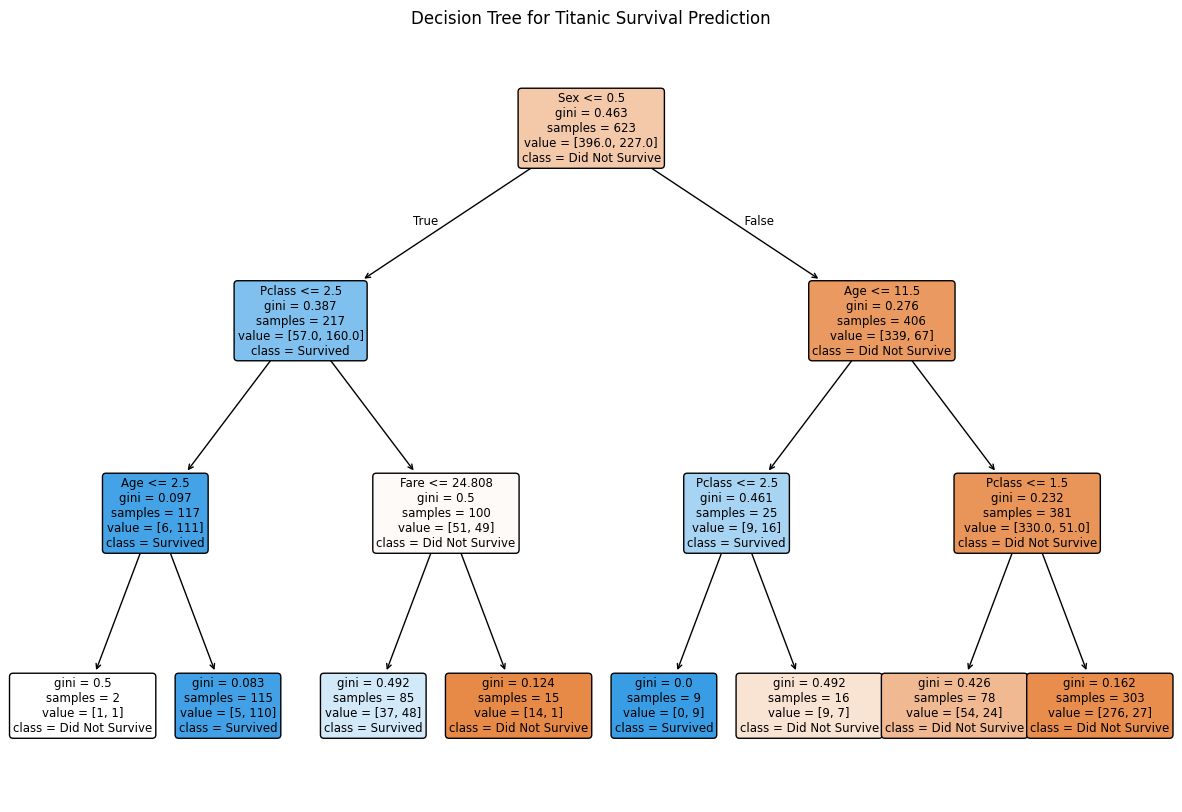

In [569]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['Did Not Survive', 'Survived'], rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()